# Monkey Classification Pytorch

### Libraries

In [1]:
import os

In [2]:
os.chdir('..')

In [3]:
from torchvision import transforms, datasets
from torchvision.datasets import ImageFolder
import torch.utils.data as data

from matplotlib.pyplot import imshow

import src.dataset.RandomImage as rI

### Data import and preprocessing training and test sets

In [4]:
BATCH_SIZE = 1000

In [5]:
preprocessing = transforms.Compose([
                #transforms.RandomResizedCrop(50, scale=(0.5, 1.0)),
                #transforms.RandomHorizontalFlip(),
                transforms.Resize((150,150)),
                transforms.ToTensor(),
                transforms.Normalize(0, 1)
            ])

##### Wczytanie danych w PyTorch

Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

In [6]:
train_data = datasets.ImageFolder('data/training/training', transform = preprocessing)
train_data_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4)

In [7]:
test_data = datasets.ImageFolder('data/validation/validation', transform = preprocessing)
test_data_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4)

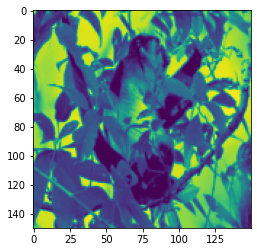

In [8]:
x, _ = train_data[10] 
imshow(x.numpy()[0])

y = 1-erythrocebus_patas


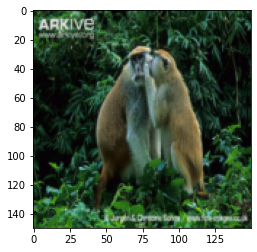

In [9]:
rI.get_random_monkey(train_data, random = True, cat_num = None, pic_num = None)

In [10]:
print(train_data.class_to_idx)

{'n0': 0, 'n1': 1, 'n2': 2, 'n3': 3, 'n4': 4, 'n5': 5, 'n6': 6, 'n7': 7, 'n8': 8, 'n9': 9}


In [11]:
print(test_data.class_to_idx)

{'n0': 0, 'n1': 1, 'n2': 2, 'n3': 3, 'n4': 4, 'n5': 5, 'n6': 6, 'n7': 7, 'n8': 8, 'n9': 9}


In [12]:
train_data

Dataset ImageFolder
    Number of datapoints: 1097
    Root location: data/training/training
    StandardTransform
Transform: Compose(
               Resize(size=(150, 150), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=0, std=1)
           )

In [13]:
train_data_loader

In [14]:
train_data[10]

(tensor([[[0.9176, 0.9137, 0.4196,  ..., 0.5961, 0.7216, 0.6980],
          [0.9059, 0.8118, 0.2745,  ..., 0.7255, 0.7373, 0.6824],
          [0.6824, 0.5686, 0.1843,  ..., 0.7608, 0.7412, 0.7059],
          ...,
          [0.6314, 0.5098, 0.6392,  ..., 0.1137, 0.0588, 0.0667],
          [0.6784, 0.6745, 0.6588,  ..., 0.1059, 0.0667, 0.0824],
          [0.7294, 0.7020, 0.6941,  ..., 0.0941, 0.0706, 0.0784]],
 
         [[0.9216, 0.9020, 0.3843,  ..., 0.6275, 0.7333, 0.7059],
          [0.9098, 0.7882, 0.2549,  ..., 0.7333, 0.7412, 0.6863],
          [0.6941, 0.5412, 0.1765,  ..., 0.7569, 0.7373, 0.7098],
          ...,
          [0.6196, 0.5216, 0.6667,  ..., 0.1490, 0.1020, 0.1059],
          [0.6784, 0.6667, 0.6510,  ..., 0.1412, 0.1059, 0.1176],
          [0.7294, 0.7020, 0.6941,  ..., 0.1294, 0.1098, 0.1176]],
 
         [[0.9608, 0.9373, 0.3608,  ..., 0.6196, 0.7608, 0.7137],
          [0.9451, 0.8078, 0.2000,  ..., 0.7686, 0.7686, 0.6431],
          [0.6824, 0.5098, 0.1059,  ...,

Size of traning example

In [15]:
train_data[10][0].shape

torch.Size([3, 150, 150])

<span style="color:red"> **Important about Layers Parameters** </span>

**From this we have:
size of a picture: nH (height) x nW (width) x nC (channels)**
    
**nH = nW = 39, nC = 3 (RGB for color pics)**

**Typicaly nH i nW maleja a nC wzrasta**

W traning datasetcie tuple, tensor obrazka + labelka

In [16]:
import torch.nn.functional as F
from torch import nn
from torch import optim
import torch

In [17]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(3,3,3,1)
        self.conv2 = nn.Conv2d(3,3,3,1)
        self.fc1 = nn.Linear(15987, 128)
        self.fc2 = nn.Linear(128, 10)

     
    def forward(self,x):
        x=self.conv1(x)
        x=F.relu(x)
        x=self.conv2(x)
        x=F.relu(x)
        x=F.max_pool2d(x,2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output
    
    
    
    

**Input for first layer:**
- **nC = 3 (*in_channels*)** 
- filter = 3 (*karnel_size*) so convolution filter is 3x3x3 (nC)
- stride = 1 (*stride*)
- padding = 0 (*padding*)
- no of filters = 10 - nC in next layer (*out_channels*)**
    
**torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1)**
**Size of input pic impact size of Flatten and linear layers
Dimension after layer =
(nC + 2p - f)/s + 1 ; (nC + 2p - f)/s + 1

In [21]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, 10, kernel_size = 3, stride = 1, padding = 0),
            nn.ReLU(),
            nn.Conv2d(10, 20, kernel_size = 5, stride = 2, padding = 0),
            nn.ReLU(),        
            nn.Conv2d(20, 40, kernel_size = 5, stride = 2, padding = 0),
            
            nn.Flatten(),
            nn.Linear(46240,10)
         

        )
    
    def forward(self, xb):
        x = self.network(xb)
        output = F.log_softmax(x, dim=1)
        return output

CNN inspired by Lenet-5

In [20]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, 6, kernel_size = 5, stride = 1, padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(6, 16, kernel_size = 5, stride = 1, padding = 0),
            nn.ReLU(),        
            nn.MaxPool2d(2,2),
            nn.Flatten(),                 
            #nn.Linear(1000, 18496),               

            nn.Linear(18496, 120),               
            nn.Linear(120, 84),
            nn.Linear(84,10)
         

        )
    
    def forward(self, xb):
        x = self.network(xb)
        output = F.log_softmax(x, dim=1)
        return output

In [18]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, 32, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
        
            nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(128 ,128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(256,256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Flatten(),
            nn.Linear(82944,1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512,10)
        )
    
    def forward(self, xb):
        return self.network(xb)

In [21]:
NeuralNet()

NeuralNet(
  (network): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten()
    (7): Linear(in_features=18496, out_features=120, bias=True)
    (8): Linear(in_features=120, out_features=84, bias=True)
    (9): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [23]:
model = NeuralNet()
optimizer = optim.Adam(model.parameters())
train_acc = []
train_loss = []
total_step = len(train_data_loader)

for e in range(100):
    model.train()
    correct = 0     
    running_loss = 0.0

    total=0
    for (i,l) in train_data_loader:
        optimizer.zero_grad()
        #data = i.view(i.size(0), -1)
        output = model(i)
        loss = F.nll_loss(output, l)
        loss.backward()
        optimizer.step() 
        running_loss += loss.item()
        _,pred = torch.max(output, dim=1)
        correct += torch.sum(pred==l).item()
        total += l.size(0)
        
    train_acc.append(100 * correct / total)
    train_loss.append(running_loss/total_step)
        
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_data_loader:
            output = model(data)
            _,pred = torch.max(output, dim=1)

            test_loss += F.nll_loss(output, target, 
                         reduction='sum').item() 
            pred = output.argmax(dim=1, keepdim=True)  
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_data_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_data_loader.dataset),
        100. * correct / len(test_data_loader.dataset)))


Test set: Average loss: 2.4713, Accuracy: 46/272 (17%)


Test set: Average loss: 2.2718, Accuracy: 51/272 (19%)


Test set: Average loss: 2.2520, Accuracy: 37/272 (14%)


Test set: Average loss: 2.1815, Accuracy: 65/272 (24%)


Test set: Average loss: 2.1239, Accuracy: 60/272 (22%)


Test set: Average loss: 2.0309, Accuracy: 59/272 (22%)


Test set: Average loss: 1.9211, Accuracy: 92/272 (34%)


Test set: Average loss: 1.8833, Accuracy: 84/272 (31%)


Test set: Average loss: 1.8221, Accuracy: 102/272 (38%)


Test set: Average loss: 1.8771, Accuracy: 94/272 (35%)


Test set: Average loss: 1.7686, Accuracy: 107/272 (39%)


Test set: Average loss: 1.7909, Accuracy: 104/272 (38%)


Test set: Average loss: 1.7141, Accuracy: 105/272 (39%)


Test set: Average loss: 1.6152, Accuracy: 120/272 (44%)


Test set: Average loss: 1.7102, Accuracy: 114/272 (42%)


Test set: Average loss: 1.5496, Accuracy: 128/272 (47%)


Test set: Average loss: 1.5669, Accuracy: 129/272 (47%)


Test set: Average loss